# Lung Cancer Risk Analysis - Exploratory Data Analysis

This Jupyter Notebook is designed to perform an exploratory data analysis (EDA) on the Lung Cancer Dataset (`LungCancerDataset.csv`). The goal of this analysis is to understand the structure and characteristics of the dataset, identify any data quality issues, and uncover patterns and relationships that could be useful for predicting lung cancer risk.

## Objectives:
1. **Data Loading**: Import necessary libraries and load the dataset.
2. **Data Understanding**: Examine the dataset structure, summary statistics, and identify missing values and duplicates.
3. **Data Cleaning & Preprocessing**: Handle missing values, encode categorical variables, normalize numerical variables, and remove outliers.
4. **Data Visualization**: Create visualizations to understand feature distributions and relationships.
5. **Correlation Analysis**: Generate a correlation heatmap to identify relationships between features.
6. **Conclusion and Next Steps**: Summarize findings and prepare the dataset for further analysis or modeling.

This notebook serves as a comprehensive guide to understanding the dataset and preparing it for predictive modeling or further analysis.

## Information:
- **Author**: Basith Mohammed
- **Date**: March 10th, 2025

---

## Introductory Steps
- Import necessary libaries and load in dataset

In [1]:
# General Imports
import pandas as pd
import numpy as np

# Data Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in the notebook
%matplotlib inline

# Make sure plots are at a reasonable size
plt.rcParams["figure.figsize"] = (8, 5)

# Supress scientific notation for clarity
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Data Loading

# Load the CSV locally:
df = pd.read_csv("LungCancerDataset.csv")

df.head()


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.83,0,0,1,1,95.98,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.69,1,1,0,1,97.18,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.58,0,1,1,0,94.97,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.79,0,1,0,1,95.19,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.73,0,1,0,1,93.50,0,0,0,0,YES


---

## Data Understanding

- **Check dataset structure** (`.info()`, `.describe()`, `.head()`)
- **Identify missing values** and **outliers**.
- Understand feature distributions using **histograms**, **boxplots**, and **pair plots**.


In [3]:
# Basic Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [4]:
# Statistical Summary
df.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,57.22,0.50,0.67,0.60,0.54,0.52,0.44,55.03,0.39,0.80,0.35,0.70,94.99,0.60,0.30,0.20,0.21
std,15.80,0.50,0.47,0.49,0.50,0.50,0.50,7.91,0.49,0.40,0.48,0.46,1.48,0.49,0.46,0.40,0.41
min,30.00,0.00,0.00,0.00,0.00,0.00,0.00,23.26,0.00,0.00,0.00,0.00,89.92,0.00,0.00,0.00,0.00
25%,44.00,0.00,0.00,0.00,0.00,0.00,0.00,49.44,0.00,1.00,0.00,0.00,93.97,0.00,0.00,0.00,0.00
50%,57.00,1.00,1.00,1.00,1.00,1.00,0.00,55.05,0.00,1.00,0.00,1.00,94.97,1.00,0.00,0.00,0.00
75%,71.00,1.00,1.00,1.00,1.00,1.00,1.00,60.32,1.00,1.00,1.00,1.00,95.99,1.00,1.00,0.00,0.00
max,84.00,1.00,1.00,1.00,1.00,1.00,1.00,83.05,1.00,1.00,1.00,1.00,99.80,1.00,1.00,1.00,1.00


In [5]:
# Quick Peek at first few rows
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.83,0,0,1,1,95.98,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.69,1,1,0,1,97.18,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.58,0,1,1,0,94.97,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.79,0,1,0,1,95.19,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.73,0,1,0,1,93.50,0,0,0,0,YES


In [6]:
# Check for Missing Values
print("Missing Values per Column:\n", df.isnull().sum())

Missing Values per Column:
 AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [7]:
# Identify Duplicate Rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 0


---

## Data Cleaning & Preprocessing

- **Handle missing values** (drop, impute, or fill).
- **Encode categorical variables** (One-Hot or Label Encoding).
- **Normalize numerical variables** if necessary.
- **Identify/remove outliers** (Z-score, IQR).
- **Handle duplicate entries** if they exist.

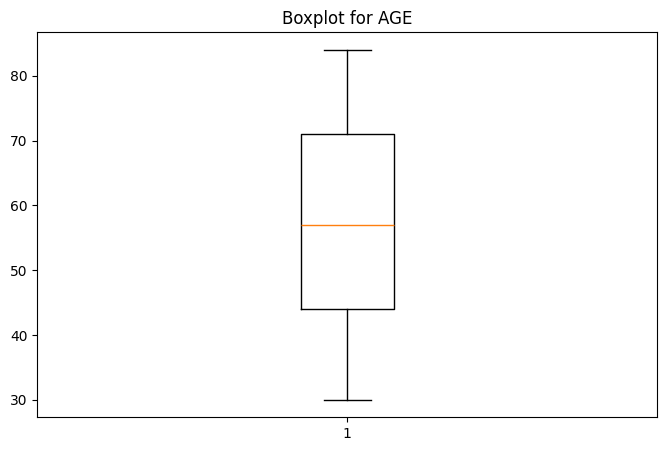

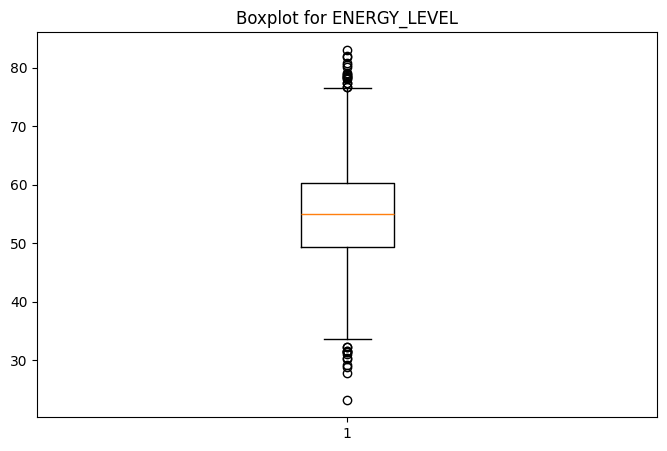

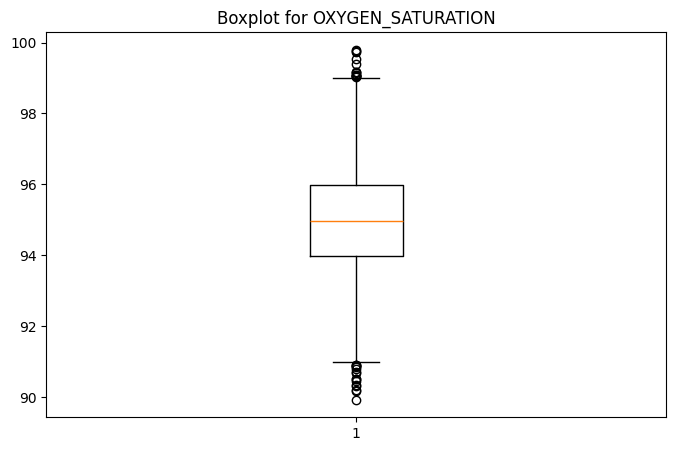

In [8]:
# Checking Outliers (Boxplot)
numeric_cols = ["AGE", "ENERGY_LEVEL", "OXYGEN_SATURATION"]  # numeric columns
for col in numeric_cols:
    plt.figure()
    plt.title(f"Boxplot for {col}")
    plt.boxplot(df[col])
    plt.show()

In [9]:
# Outlier Removal (IQR Method)
def remove_outliers_iqr(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered = data[(data[col_name] >= lower_bound) & (data[col_name] <= upper_bound)]
    return filtered

df_cleaned = remove_outliers_iqr(df, "ENERGY_LEVEL")
df_cleaned = remove_outliers_iqr(df, "OXYGEN_SATURATION")
print(f"Original DF shape: {df.shape}")
print(f"After outlier removal in 'energy_level': {df_cleaned.shape}")

Original DF shape: (5000, 18)
After outlier removal in 'energy_level': (4970, 18)


#### Encode Categorical Variables
If you have columns such as "gender" in string form ("Male", "Female"), or "YES"/"NO",
you can encode them using One-Hot or Label Encoding. Since many columns in this dataset
are already 0/1 or True/False, you may not need to do much here.


In [10]:
# Encoding "YES"/"NO" to 1/0 for PULMONARY_DISEASE

# Before encoding, quickly check the unique values:
print("Unique values before encoding:", df_cleaned["PULMONARY_DISEASE"].unique())

# Map "YES" to 1, "NO" to 0
df_cleaned["PULMONARY_DISEASE"] = df_cleaned["PULMONARY_DISEASE"].map({"YES": 1, "NO": 0})

# Confirm the encoding
print("Unique values after encoding:", df_cleaned["PULMONARY_DISEASE"].unique())

df_cleaned.head()


Unique values before encoding: ['NO' 'YES']
Unique values after encoding: [0 1]


/var/folders/r_/2j0b96s94x59n3brlvfm1llh0000gn/T/ipykernel_46655/2969441605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["PULMONARY_DISEASE"] = df_cleaned["PULMONARY_DISEASE"].map({"YES": 1, "NO": 0})


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.83,0,0,1,1,95.98,1,0,0,0,0
1,81,1,1,0,0,1,1,47.69,1,1,0,1,97.18,0,0,0,0,1
2,58,1,1,0,0,0,0,59.58,0,1,1,0,94.97,0,0,0,0,0
3,44,0,1,0,1,1,0,59.79,0,1,0,1,95.19,0,0,0,0,1
4,72,0,1,1,1,1,1,59.73,0,1,0,1,93.50,0,0,0,0,1


---

## Data Visualization

- **Correlation Heatmap** (Seaborn `heatmap()`)
- **Bar plots** for categorical variables
- **Box plots** to detect outliers
- **Pair plots** for feature relationships

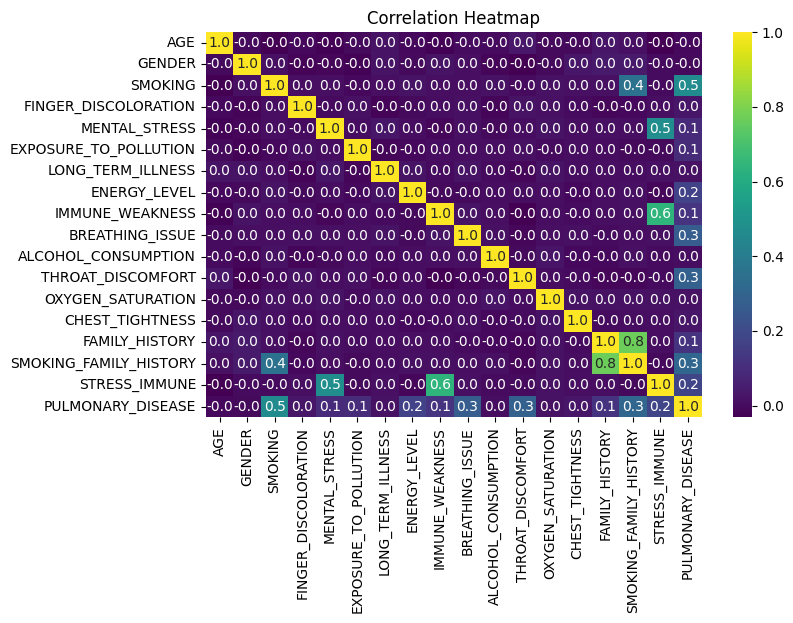

In [11]:
# Correlation Heatmap
# Only relevant for numeric or boolean columns
corr = df_cleaned.corr(numeric_only=True)

plt.figure()
sns.heatmap(corr, annot=True, fmt=".1f", cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

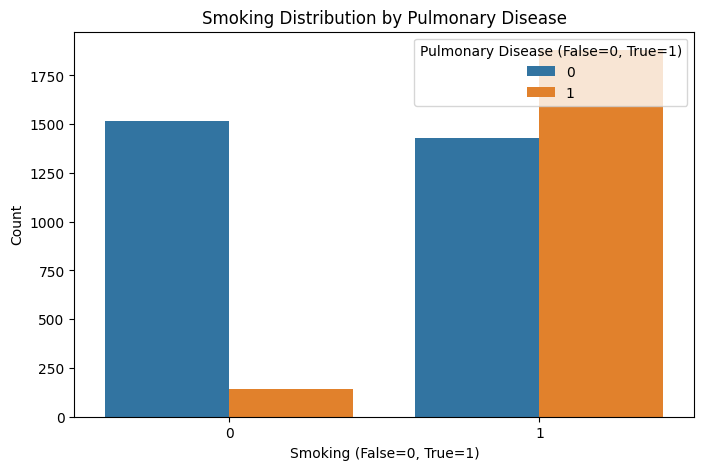

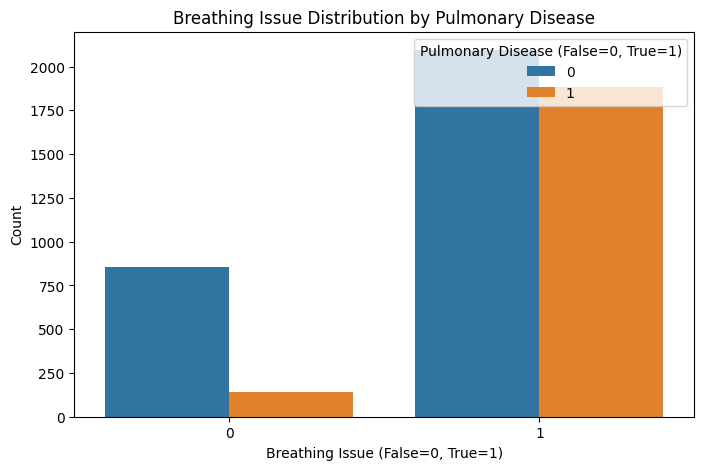

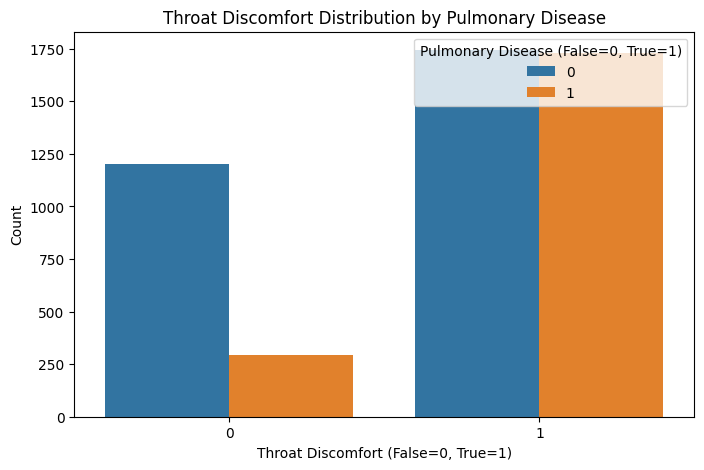

In [12]:
# Bar Plots for Categorical Variables

# SMOKING -- 0.5 Correlation with Pulmonary Disease
plt.figure()
sns.countplot(data=df_cleaned, x="SMOKING", hue="PULMONARY_DISEASE")
plt.title("Smoking Distribution by Pulmonary Disease")
plt.xlabel("Smoking (False=0, True=1)")
plt.ylabel("Count")
plt.legend(title="Pulmonary Disease (False=0, True=1)", loc="upper right")
plt.show()

# BREATHING_ISSUE -- 0.3 Correlation with Pulmonary Disease
plt.figure()
sns.countplot(data=df_cleaned, x="BREATHING_ISSUE", hue="PULMONARY_DISEASE")
plt.title("Breathing Issue Distribution by Pulmonary Disease")
plt.xlabel("Breathing Issue (False=0, True=1)")
plt.ylabel("Count")
plt.legend(title="Pulmonary Disease (False=0, True=1)", loc="upper right")
plt.show()

# THROAT_DISCOMFORT -- 0.3 Correlation with Pulmonary Disease
plt.figure()
sns.countplot(data=df_cleaned, x="THROAT_DISCOMFORT", hue="PULMONARY_DISEASE")
plt.title("Throat Discomfort Distribution by Pulmonary Disease")
plt.xlabel("Throat Discomfort (False=0, True=1)")
plt.ylabel("Count")
plt.legend(title="Pulmonary Disease (False=0, True=1)", loc="upper right")
plt.show()

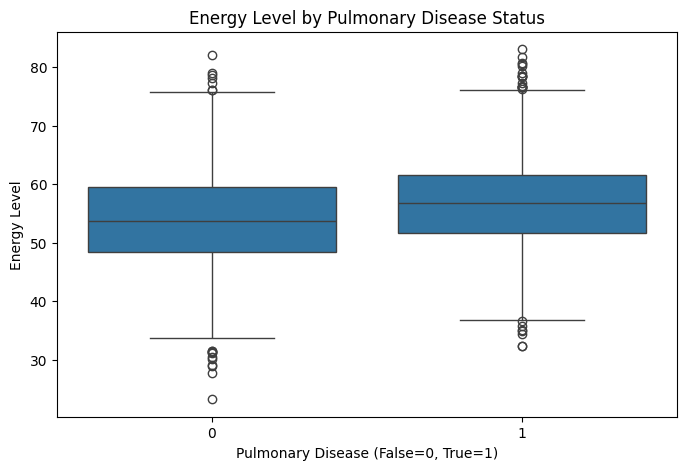

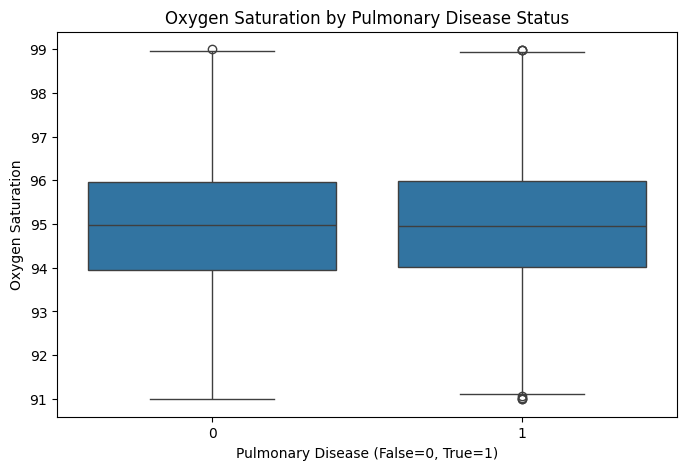

In [13]:
# Box Plot for Numeric Features

# ENERGY_LEVEL -- 0.2 Correlation with Pulmonary Disease
plt.figure()
sns.boxplot(data=df_cleaned, x="PULMONARY_DISEASE", y="ENERGY_LEVEL")
plt.title("Energy Level by Pulmonary Disease Status")
plt.xlabel("Pulmonary Disease (False=0, True=1)")
plt.ylabel("Energy Level")
plt.show()

# OXYGEN_SATURATION -- 0.0 Correlation with Pulmonary Disease
plt.figure()
sns.boxplot(data=df_cleaned, x="PULMONARY_DISEASE", y="OXYGEN_SATURATION")
plt.title("Oxygen Saturation by Pulmonary Disease Status")
plt.xlabel("Pulmonary Disease (False=0, True=1)")
plt.ylabel("Oxygen Saturation")
plt.show()


---

## Conclusion and Key Insights

### Data Cleaning and Preprocessing:
1. **Missing Values**: The dataset did not contain any missing values, ensuring completeness.
2. **Outliers**: Outliers were identified and removed using the IQR method for the `ENERGY_LEVEL` and `OXYGEN_SATURATION` columns.
3. **Categorical Encoding**: The `PULMONARY_DISEASE` column was successfully encoded from "YES"/"NO" to 1/0.

### Exploratory Data Analysis (EDA):
1. **Dataset Structure**: The dataset consists of 5000 rows and 18 columns, with a mix of numerical and categorical data.
2. **Correlation Analysis**: 
    - `SMOKING` showed a strong positive correlation (0.46) with `PULMONARY_DISEASE`.
    - `BREATHING_ISSUE` and `THROAT_DISCOMFORT` also showed moderate positive correlations (0.27 and 0.28 respectively) with `PULMONARY_DISEASE`.
    - `ENERGY_LEVEL` had a weaker positive correlation (0.17) with `PULMONARY_DISEASE`.
3. **Visualizations**:
    - **Bar Plots**: Visualized the distribution of `SMOKING`, `BREATHING_ISSUE`, and `THROAT_DISCOMFORT` by `PULMONARY_DISEASE` status.
    - **Box Plots**: Showed the distribution of `ENERGY_LEVEL` and `OXYGEN_SATURATION` by `PULMONARY_DISEASE` status.
    - **Correlation Heatmap**: Provided a comprehensive view of the relationships between all numerical and boolean features.

### Key Insights:
1. **Smoking**: There is a significant association between smoking and the presence of pulmonary disease, suggesting that smoking is a major risk factor.
2. **Breathing Issues and Throat Discomfort**: These symptoms are moderately associated with pulmonary disease, indicating their potential as predictive features.
3. **Energy Levels**: Lower energy levels are slightly associated with pulmonary disease, which could be indicative of the overall health impact of the disease.
4. **Data Quality**: The dataset is clean with no missing values or duplicates, and outliers have been handled appropriately.

### Next Steps:
1. **Modeling**: With the cleaned and preprocessed dataset, we are ready to proceed with building predictive models to identify individuals at risk of pulmonary disease.
2. **Feature Engineering**: Further feature engineering could be performed to enhance model performance, such as creating interaction terms or deriving new features from existing ones.
3. **SQL Integration**: If needed, we can integrate the dataset with SQL databases for more complex queries and data management.

This concludes the exploratory data analysis and data preprocessing steps. The dataset is now ready for predictive modeling and further analysis.

---